#### Recap on SVD

Let $A\in \mathbf{R}^{m \times n}$ (tall, square or fat), its `singular value decomposition` is given by

$$A=U\Sigma V^T=\sum_{i=1}^r\sigma_i u_i v_i^T$$

where
* $A\in \mathbf{R}^{m \times n}$, $\text{rank}(A)=r$
* $U\in \mathbf{R}^{m \times r}$, $U^TU=I$
* $V\in \mathbf{R}^{n \times r}$, $V^TV=I$
* $\Sigma =\text{diag}(\sigma_1, \cdots, \sigma_r)$, $\sigma_1 \geq\cdots\geq \sigma_r > 0$
* $\sigma_1, \cdots, \sigma_r$ are nonzero singular values of $A$
* $v_i\in \mathbf{R}^n$ are right singular vectors of $A$
* $u_i\in \mathbf{R}^m$ are left singular vectors of $A$

Also, we have

$$A^TA=(U\Sigma V^T)^T(U\Sigma V^T)=V\Sigma^2V^T$$

Therefore
* $v_i\in \mathbf{R}^n$ are eigenvectors of symmetric $A^TA$ (corresponding to `nonzero` eigenvalues), and `orthonormal basis` for $R(A^T)$
* $\sigma_i=\sqrt{\lambda_i(A^TA)}$ are square root of nonzero eigenvalues of $A^TA$
* recall
$$\max\frac{\|Ax\|^2}{\|x\|^2}=\max\frac{x^T(A^TA)x}{\|x\|^2}=\boxed{\lambda_{\max} \,(A^TA)}$$

* therefore, $v_1$ is the input direction with `largest gain`
* `largest gain` or `matrix norm` of $A$ is $\boxed{\|A\|=\sigma_1}$

#### Principal component analysis (PCA)

Now, if we let $A$ be a `data matrix`, where each row represents a data point, and each column represents data features, and each columm is normalized

##### Generate data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.2e}'.format})

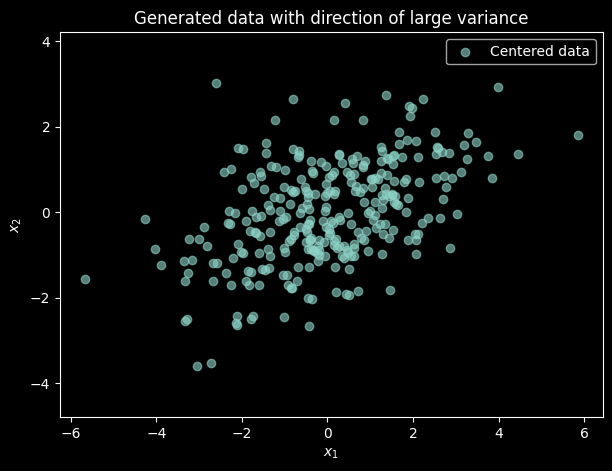

In [ ]:
np.random.seed(42)

# Generate data
mean = [0, 0]
n_pts = 300
cov = [[3, 1], [1, 1.5]]  # Covariance matrix
raw_data = np.random.multivariate_normal(mean, cov, 300)

A_data = raw_data - np.mean(raw_data, axis=0) # Normalize data

plt.figure(figsize=(7, 5))
plt.scatter(A_data[:, 0], A_data[:, 1], alpha=0.6, label='Centered data')
plt.title("Generated data with direction of large variance")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axis('equal')
plt.legend()
plt.show()

##### Covariance in data

Since our data matrix $A$ is normalized, we can write it as

$$A=\begin{bmatrix}x_{11}-\mu_1 &\cdots & x_{1n}-\mu_n \\
x_{21}-\mu_1 &\cdots & x_{2n}-\mu_n\\
\vdots & \ddots & \vdots \\
x_{m1}-\mu_1 &\cdots & x_{mn}-\mu_n
\end{bmatrix}$$

where $x_{ij}$ is the `jth` data `feature` of the `ith` data `point`, that is, we have $m$ data points, and each having $n$ data features

In our example $m=300$, $n=2$

Now, if we compute $A^TA$, we get a `scaled` version of the covariance matrix of data along $n$ `feature directions` as

$$(A^TA)_{ij}=\sum_{k=1}^{m}(x_{ki}-\mu_i)(x_{kj}-\mu_j)$$

represents scaled covariance between data along `ith` and `jth` feature directions

$$ \text{Cov}_{ij}= \frac{1}{m-1}\sum_{k=1}^{m}(x_{ki}-\mu_i)(x_{kj}-\mu_j)$$

##### Principal components

Good, now we want to know what is the `direction with the largest data variance`, then the next direction with the largest variance and so on...we call these `principal components` (PCs)

From eigendecomposition, we know these are directions of the `eigenvectors` of $A^TA$: $q_1, q_2, \cdots, q_n$ (which are also directions of `right singular vectors`: $v_1, v_2, \cdots, v_n$ in SVD of $A$)

If we resolve data into `principal component basis`, we expect data to have largest variance on PC1, next largest variance on PC2, etc...

In [ ]:
# Do SVD
U, S, Vt = np.linalg.svd(A_data)
V = Vt.T

# Resolve each row of A_data into PC basis (which are columns of V) to obtain coefficients of expansion of data
pc_data = np.dot(A_data, V)

pc_1 = V[:, 0]
pc_2 = V[:, 1]

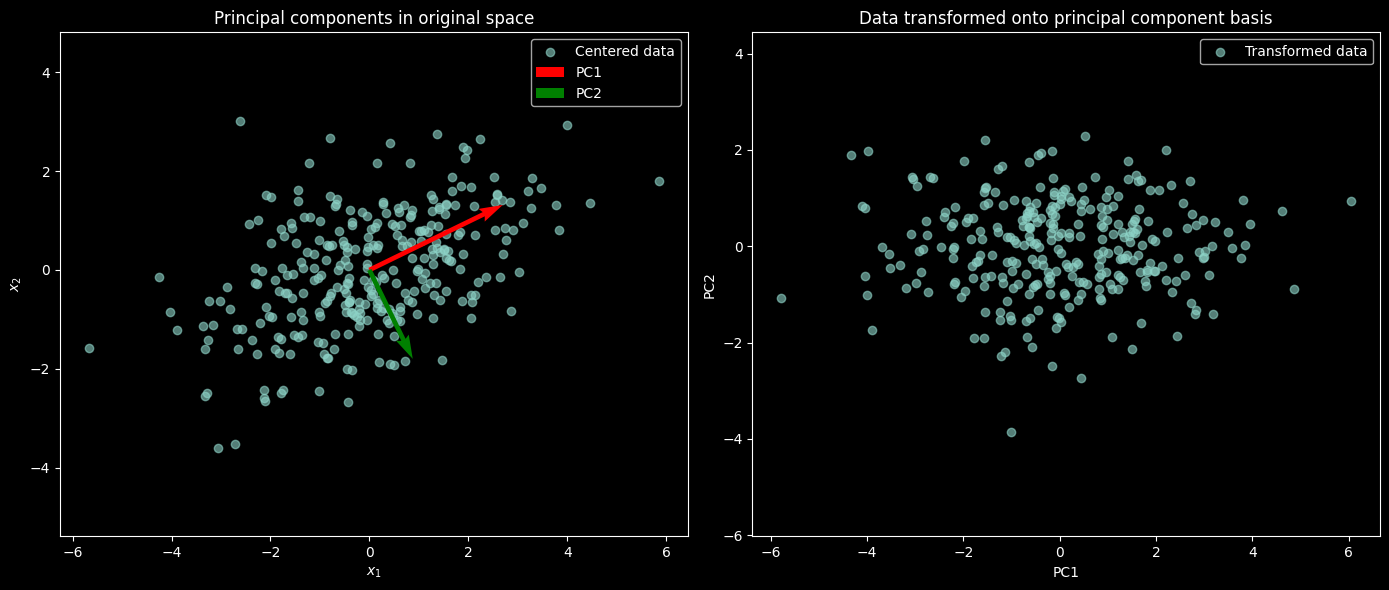

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Principal component directions in original space
ax[0].scatter(A_data[:, 0], A_data[:, 1], alpha=0.6, label="Centered data")
ax[0].quiver(0, 0, 3*pc_1[0], 3*pc_1[1], angles='xy', scale_units='xy', scale=1, color='r', label='PC1')
ax[0].quiver(0, 0, 2*pc_2[0], 2*pc_2[1], angles='xy', scale_units='xy', scale=1, color='g', label='PC2')
ax[0].set_title("Principal components in original space")
ax[0].set_xlabel("$x_1$")
ax[0].set_ylabel("$x_2$")
ax[0].axis('equal')
ax[0].legend()

# Data transformed onto principal component basis
ax[1].scatter(pc_data[:, 0], pc_data[:, 1], alpha=0.6, label="Transformed data")
ax[1].set_title("Data transformed onto principal component basis")
ax[1].set_xlabel("PC1")
ax[1].set_ylabel("PC2")
ax[1].axis('equal')
ax[1].legend()

plt.tight_layout()
plt.show()

##### Check using sklearn

Check our results again results from sklearn

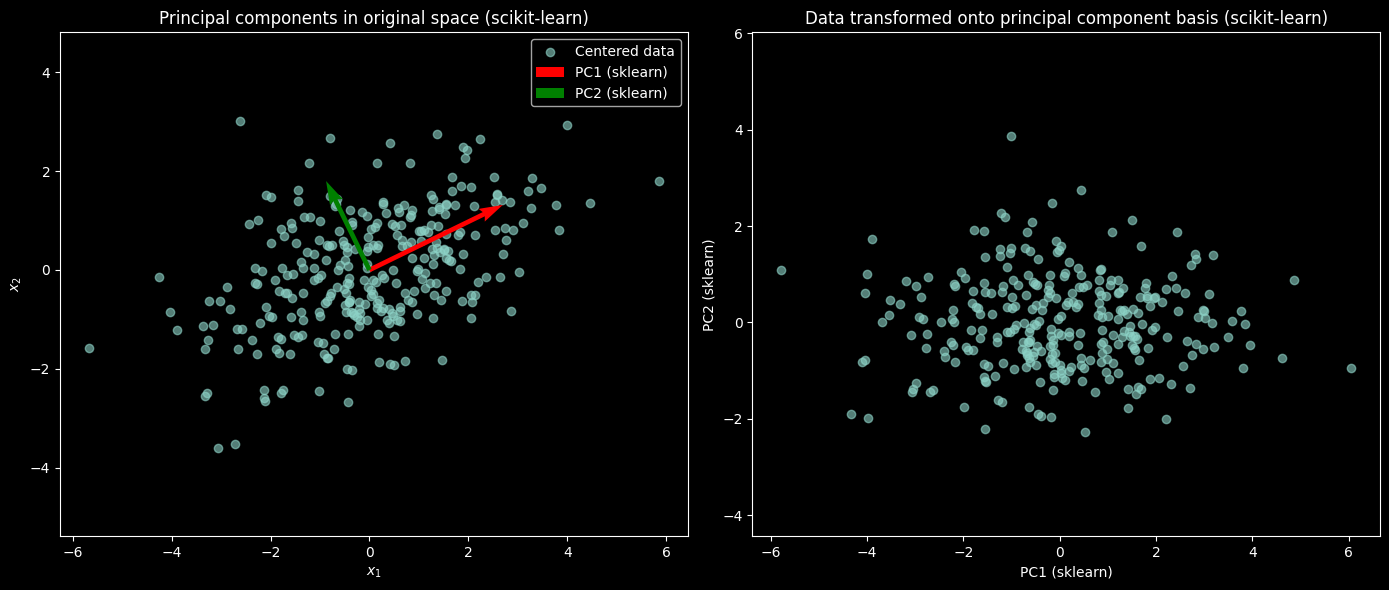

In [ ]:
pca = PCA(n_components=2)  # Initialize PCA to find the first 2 principal components
pc_data_sklearn = pca.fit_transform(A_data)  # Fit and transform data

pc_1_sklearn = pca.components_[0]
pc_2_sklearn = pca.components_[1]

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(A_data[:, 0], A_data[:, 1], alpha=0.6, label="Centered data")
axs[0].quiver(0, 0, 3*pc_1_sklearn[0], 3*pc_1_sklearn[1], angles='xy', scale_units='xy', scale=1, color='r', label='PC1 (sklearn)')
axs[0].quiver(0, 0, 2*pc_2_sklearn[0], 2*pc_2_sklearn[1], angles='xy', scale_units='xy', scale=1, color='g', label='PC2 (sklearn)')
axs[0].set_title("Principal components in original space (scikit-learn)")
axs[0].set_xlabel("$x_1$")
axs[0].set_ylabel("$x_2$")
axs[0].axis('equal')
axs[0].legend()

axs[1].scatter(pc_data_sklearn[:, 0], pc_data_sklearn[:, 1], alpha=0.6, label="Transformed data")
axs[1].set_title("Data transformed onto principal component basis (scikit-learn)")
axs[1].set_xlabel("PC1 (sklearn)")
axs[1].set_ylabel("PC2 (sklearn)")
axs[1].axis('equal')

plt.tight_layout()
plt.show()